<a href="https://colab.research.google.com/github/aparnaashok2125/Elevvo-Pathways-ML-Internship/blob/main/Elevvo_Pathways_ML_Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Traffic Sign Recognition Using Deep Learning**

##*Industry-Level Project – Task 8 | GTSRB Dataset*

In this project, the goal is to build a robust deep learning model to automatically recognize and classify various traffic signs based on images. This task uses the GTSRB (German Traffic Sign Recognition Benchmark) dataset, which contains thousands of labeled traffic sign images across multiple classes, making it ideal for real-world applications such as autonomous driving and intelligent traffic systems.

The workflow involves:

*   Preprocessing the image data (resizing to uniform dimensions, normalization)
*   Building a Convolutional Neural Network (CNN) using TensorFlow/Keras to learn and classify traffic sign features.
*   And finally, evaluating the model using accuracy and a confusion matrix to measure its performance across different classes.

This project emphasizes essential skills in computer vision, multi-class classification, and deep learning, demonstrating how machine learning can be used for safety-critical tasks in smart transportation.

# Importing Dataset and Necessary Libraries

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer,Layer,Dense,Conv2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.layers import Normalization,Dropout,Activation
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns





# Data Visualization

In [ ]:
base_path = "/kaggle/input/gtsrb-german-traffic-sign"
dataset_path = os.path.join(base_path, "Meta.csv")

df = pd.read_csv(dataset_path)
print(df.head())
print(df.shape)
print(len(df))

          Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22
(43, 5)
43


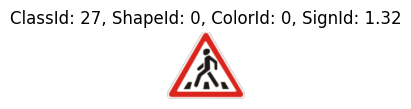

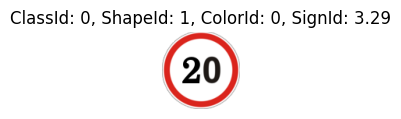

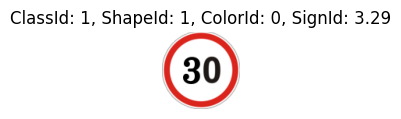

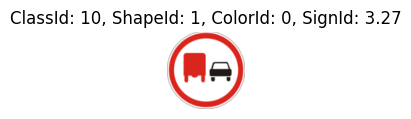

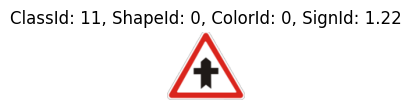

In [ ]:
# Show first 5 images
for i in range(5):
    row = df.iloc[i]
    img = Image.open(f"{base_path}/{row['Path']}")
    plt.figure(figsize=(1, 2))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"ClassId: {row['ClassId']}, ShapeId: {row['ShapeId']}, ColorId: {row['ColorId']}, SignId: {row['SignId']}")
    plt.show()

# Feature Extracion and Image Resizing

In [ ]:
X=df[['Path','ShapeId','ColorId','SignId' ]]
y=df['ClassId']

In [ ]:
IMG_SIZE = 64
base_path = "/kaggle/input/gtsrb-german-traffic-sign/Train"

images = []
labels = []

images_per_class = 60

for class_id in sorted(os.listdir(base_path)):
    class_path = os.path.join(base_path, class_id)
    if not os.path.isdir(class_path):
        continue

    img_files = os.listdir(class_path)[:images_per_class]
    for img_file in img_files:
        img_path = os.path.join(class_path, img_file)
        try:
            img = Image.open(img_path).convert("RGB").resize((IMG_SIZE, IMG_SIZE))
            img_array = np.array(img) / 255.0
            images.append(img_array)
            labels.append(int(class_id))
        except:
            print(f"Failed to load {img_path}")


# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = np.array(images)
y = np.array(labels)

num_classes = len(np.unique(y))

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
train_y_cat = to_categorical(train_y, num_classes)
test_y_cat = to_categorical(test_y, num_classes)


# Building the Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer, Conv2D, MaxPooling2D,
                                     BatchNormalization, Flatten, Dense, Dropout)

model = Sequential([
    InputLayer(shape=(IMG_SIZE, IMG_SIZE, 3)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 31, 31, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,643 (2.63 MB)

 Trainable params: 689,195 (2.63 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
train_X.shape[0]


1806

In [ ]:
print(train_X.shape, train_y_cat.shape)
print(test_X.shape, test_y_cat.shape)
print(type(train_y_cat), train_y_cat.dtype)


(1806, 64, 64, 3) (1806, 43)
(774, 64, 64, 3) (774, 43)
<class 'numpy.ndarray'> float64


# Training

In [ ]:
history = model.fit(train_X, train_y_cat, epochs=15 ,validation_data=(test_X, test_y_cat), batch_size=32)


Epoch 1/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 240ms/step - accuracy: 0.1204 - loss: 4.3655 - val_accuracy: 0.0452 - val_loss: 3.7218
Epoch 2/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 234ms/step - accuracy: 0.4064 - loss: 2.1573 - val_accuracy: 0.0672 - val_loss: 3.6363
Epoch 3/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - accuracy: 0.6132 - loss: 1.2875 - val_accuracy: 0.1344 - val_loss: 3.5659
Epoch 4/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.7440 - loss: 0.8475 - val_accuracy: 0.1460 - val_loss: 3.5217
Epoch 5/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - accuracy: 0.8256 - loss: 0.5508 - val_accuracy: 0.2597 - val_loss: 3.1731
Epoch 6/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.8986 - loss: 0.3501 - val_accuracy: 0.4755 - val_loss: 2.0536
Epoch 7/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.9095 - loss: 0.2768 - val_accuracy: 0.6318 - val_loss: 1.4042
Epoch 8/15
57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 230ms/step - accuracy: 0.9323 - loss: 0.2198 - val_accu

# Evaluation and Visualization

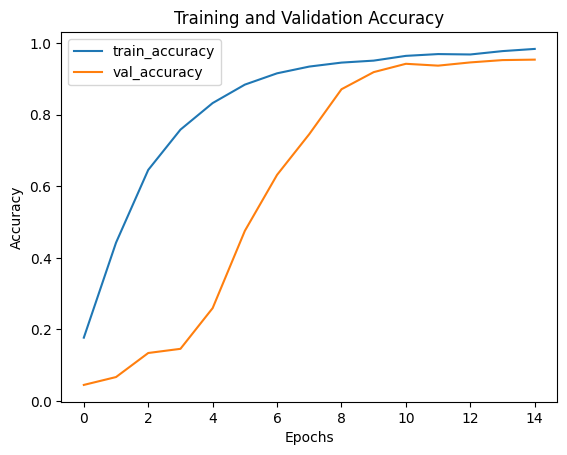

In [ ]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_y_cat)
print(f"Test accuracy: {test_acc*100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9449 - loss: 0.1678
Test accuracy: 95.35%


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


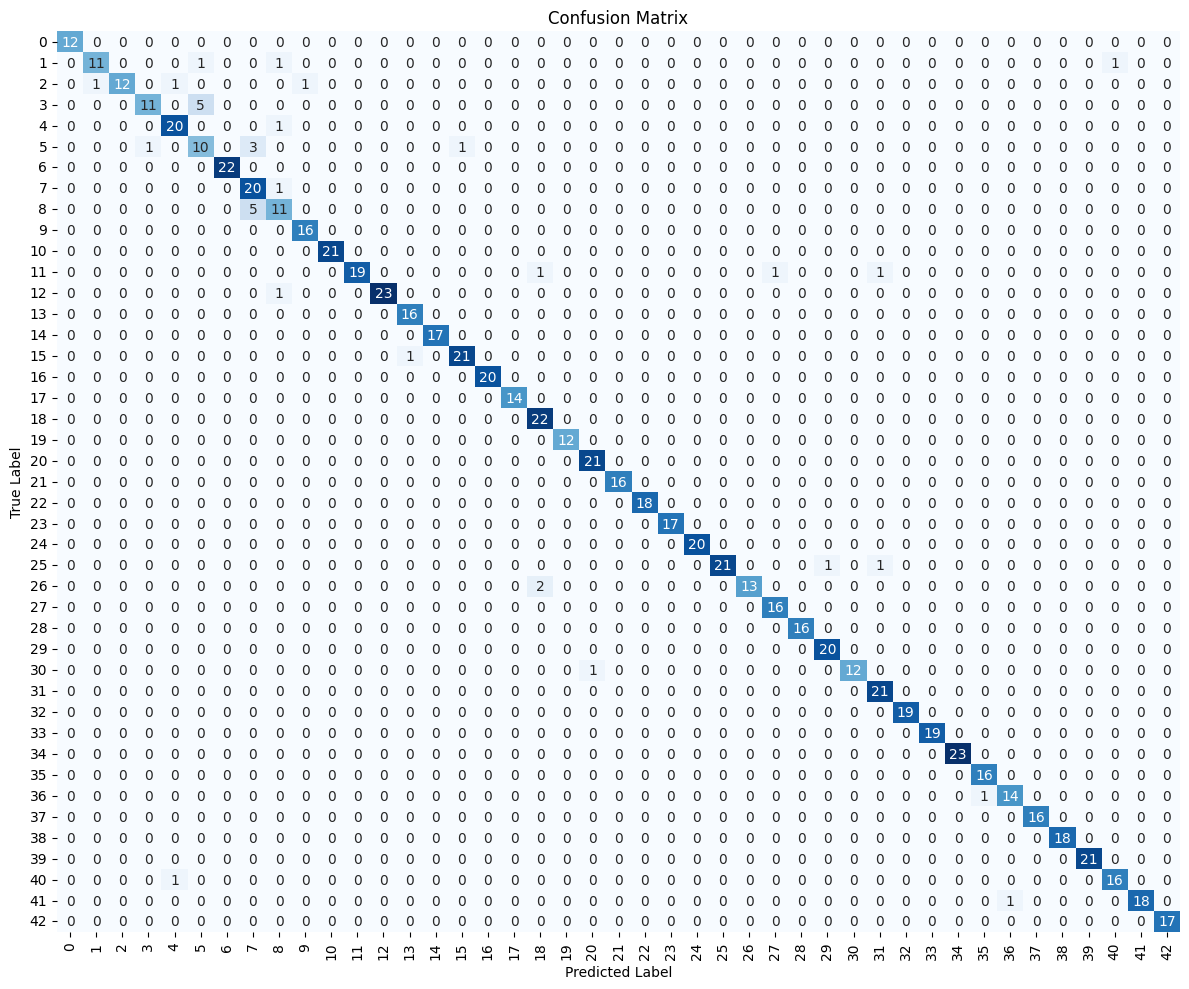

In [ ]:
y_pred_probs = model.predict(test_X)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(test_y_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot using seaborn for better formatting
plt.figure(figsize=(12, 10))  # You can increase size if needed
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()